In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
image = cv2.imread(r"C:\Users\rawat\imageDetect/living_room.jpg")
type(image)

numpy.ndarray

In [2]:
image.shape

(530, 600, 3)

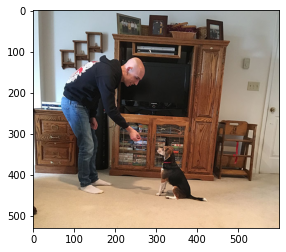

In [3]:
plt.imshow(image)
new_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(new_image)

In [4]:
"""
1.Splitting image channels
"""
r,g,b = cv2.split(new_image)
print('r',r.shape)
print('g',g.shape)
print('b',b.shape)
new_image =  cv2.merge((r,g,b))


r (530, 600)
g (530, 600)
b (530, 600)


In [5]:

"""
Resize the image
"""
s = 10
w = int(new_image.shape[1]*s/100)
h = int(new_image.shape[0]*s/100)
dim = (w,h)
re_size = cv2.resize(new_image, dim, interpolation = cv2.INTER_AREA)
re_size.shape

(53, 60, 3)

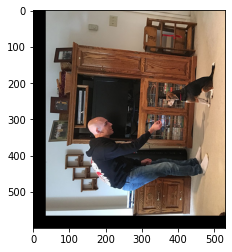

In [6]:
"""
rotate operation
"""
(h,w) = new_image.shape[:2]
c = (w/2, h/2)
angle = 90
m = cv2.getRotationMatrix2D(c, angle, 1.0)
rotate_90 = cv2.warpAffine(new_image, m, (h,w))

plt.imshow(rotate_90)

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [8]:
yolo = cv2.dnn.readNet(r"C:\Users\rawat\imageDetect/yolov3.weights",r"C:\Users\rawat\imageDetect/yolov3.cfg")

In [9]:
classes = []

with open(r"C:\Users\rawat\imageDetect/coco.names", 'r') as f:
  classes = f.read().splitlines()

In [10]:
len(classes)

80

In [11]:
img = cv2.imread(r"C:\Users\rawat\imageDetect/living_room.jpg")
height,width, _ = img.shape

blob = cv2.dnn.blobFromImage(img, 1/255, (320,320),(0,0,0), swapRB = True, crop = False)

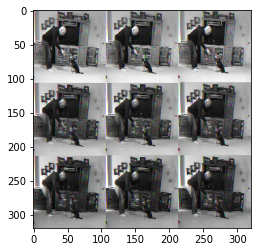

In [12]:
# to print image

i = blob[0].reshape(320,320,3)
plt.imshow(i)

In [13]:
blob.shape

(1, 3, 320, 320)

In [14]:
!pip3 install --upgrade opencv-python==4.2.0.34

Requirement already up-to-date: opencv-python==4.2.0.34 in c:\users\rawat\anaconda3\envs\tf\lib\site-packages (4.2.0.34)


In [15]:
yolo.setInput(blob)

In [27]:
output_layes_name = yolo.getUnconnectedOutLayersNames()  
layeroutput = yolo.forward(output_layes_name)

In [28]:
boxes = []
confidences = []
class_ids = []

for output in layeroutput:
  for detection in output:
    score = detection[5:]
    class_id = np.argmax(score)
    confidence = score[class_id]
    if (confidence > 0.7):
      center_x = int(detection[0]* width)
      center_y = int(detection[1]* height)
      w = int(detection[2]*width)
      h = int(detection[3]*height)

      x = int(center_x- w/2)
      y = int(center_y- h/2)

      boxes.append([x,y,w,h])
      confidences.append(float(confidence))
      class_ids.append(class_id)

In [29]:
len(boxes)

5

In [19]:
indexes = cv2.dnn.NMSBoxes(boxes,confidences , 0.5, 0.4)

In [20]:
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0,255, size = (len(boxes), 3))

In [21]:
for i in indexes.flatten():
  x,y,w,h = boxes[i]

  label = str(classes[class_ids[i]])
  confi = str(round(confidences[i], 2))
  color = colors[i]

  cv2.rectangle(img, (x,y), (x+w, y+h), color, 1)
  cv2.putText(img, label+" "+confi, (x, y+20), font, 2, (50,255,255), 2)

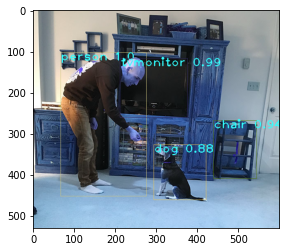

In [22]:
plt.imshow(img)

In [23]:
  cv2.imwrite("./img.jpg",img)

True